<a href="https://colab.research.google.com/github/ojan0319/CobaStock/blob/main/Tugas_Data_Science_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Load dataset

In [28]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [30]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Knowing the size of the dataset

In [31]:
df.shape

(21613, 21)

## Dataset information

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Handling missing value

In [33]:
print("BEFORE HANDLING")
df.isna().sum()

BEFORE HANDLING


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
print("AFTER HANDLING")
df.dropna(axis=0, inplace=True)
df.isna().sum()

AFTER HANDLING


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Handling duplicate data

In [35]:
df.duplicated().any()

False

In [36]:
df.duplicated().sum()

0

In [38]:
df.drop_duplicates(inplace=True)

## Data Preprocessing

In [39]:
nums = [data for data in dict(df.dtypes) if dict(df.dtypes)[data] in ['float64', 'int64']]
strs = [data for data in dict(df.dtypes) if dict(df.dtypes)[data] in ['object']]

In [42]:
#statistik data numerik
#df[nums].describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [43]:
#informasi data string/objek
df[strs].describe()

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [44]:
for col in nums:
    print(f'''Value count pada kolom {col}:''')
    print('==================================')
    print(df[col].value_counts())
    print()
    print('==================================')

Value count pada kolom id:
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

Value count pada kolom price:
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

Value count pada kolom bedrooms:
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Value count pada kolom bathrooms:
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10


In [45]:
for col in strs:
    print(f'''Value count pada kolom {col}:''')
    print('==================================')
    print(df[col].value_counts())
    print()
    print('==================================')

Value count pada kolom date:
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64



In [49]:
#fitur tiap properti (dalam kolom)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [50]:
df['bathrooms'] = df['bathrooms'].astype(int)

In [51]:
df_new = df.drop(columns=['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 
                          'condition', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode',
                          'lat', 'long', 'sqft_living15', 'sqft_lot15'])
df_new.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Exploratory Data Analysis

In [84]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


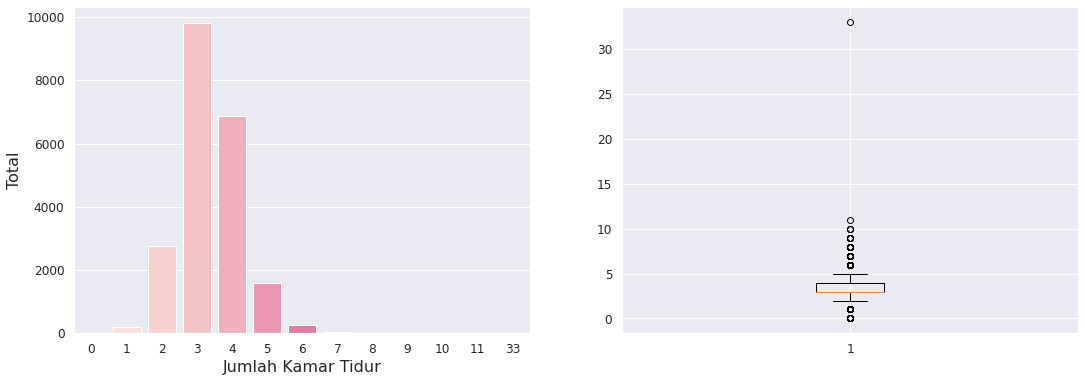

In [85]:
fig = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

fig.add_subplot(1,2,1)
p = sns.countplot(df_new['bedrooms'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Jumlah Kamar Tidur', fontsize=16)

fig.add_subplot(1,2,2)
plt.boxplot(df_new['bedrooms'])
    
plt.show()

In [86]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['bedrooms'], .25)
Q2 = np.quantile(df_new['bedrooms'], .50)
Q3 = np.quantile(df_new['bedrooms'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['bedrooms'])
nilai_max = np.max(df_new['bedrooms'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  3.0
Kuartil 2 =  3.0
Kuartil 3 =  4.0
IQR =  1.0
IQR minimum =  1.5
IQR maksimum =  5.5
Nilai minimum data =  0
Nilai maksimum data =  33


In [87]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Ditemukan low outlier!
Ditemukan high outlier!


In [88]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['bedrooms']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
High outlier : 
 [6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 8, 8, 9, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 8, 6, 6,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


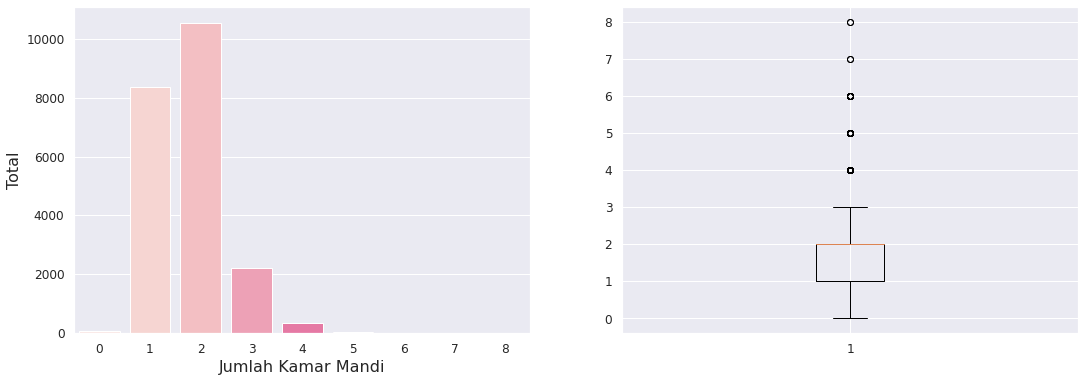

In [89]:
fig = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

fig.add_subplot(1,2,1)
p = sns.countplot(df_new['bathrooms'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Jumlah Kamar Mandi', fontsize=16)

fig.add_subplot(1,2,2)
plt.boxplot(df_new['bathrooms'])
    
plt.show()

In [90]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['bathrooms'], .25)
Q2 = np.quantile(df_new['bathrooms'], .50)
Q3 = np.quantile(df_new['bathrooms'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['bathrooms'])
nilai_max = np.max(df_new['bathrooms'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  1.0
Kuartil 2 =  2.0
Kuartil 3 =  2.0
IQR =  1.0
IQR minimum =  -0.5
IQR maksimum =  3.5
Nilai minimum data =  0
Nilai maksimum data =  8


In [91]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Ditemukan high outlier!


In [92]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['bathrooms']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 []
High outlier : 
 [4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 6, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 5, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 6, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 6, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 6, 4, 

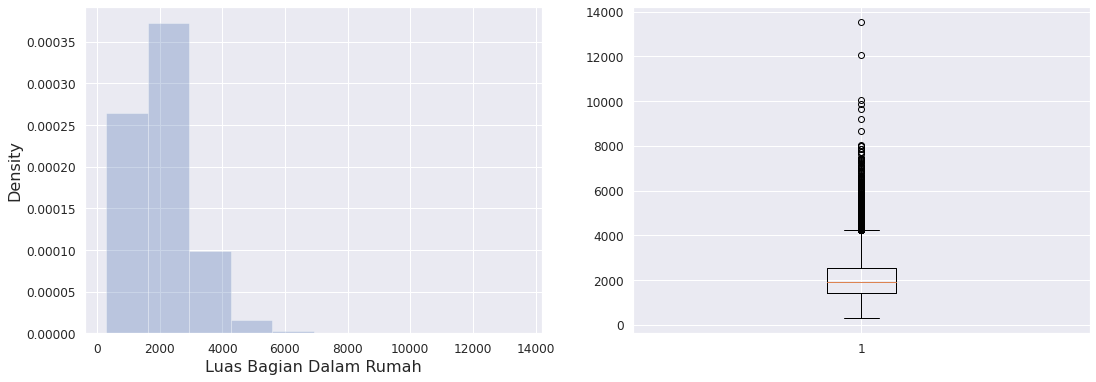

In [93]:
f = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

f.add_subplot(1,2,1)
# df_new['sqft_living'].plot(kind='kde')
df_new['sqft_living'].hist(density=True, alpha=0.3)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Luas Bagian Dalam Rumah', fontsize=16)

f.add_subplot(1,2,2)
plt.boxplot(df_new['sqft_living'])
plt.show()

In [94]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['sqft_living'], .25)
Q2 = np.quantile(df_new['sqft_living'], .50)
Q3 = np.quantile(df_new['sqft_living'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['sqft_living'])
nilai_max = np.max(df_new['sqft_living'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  1427.0
Kuartil 2 =  1910.0
Kuartil 3 =  2550.0
IQR =  1123.0
IQR minimum =  -257.5
IQR maksimum =  4234.5
Nilai minimum data =  290
Nilai maksimum data =  13540


In [95]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Ditemukan high outlier!


In [96]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['sqft_living']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 []
High outlier : 
 [5420, 4770, 4380, 5180, 4410, 5050, 5310, 4550, 4290, 4290, 4800, 6070, 4870, 4860, 4860, 4410, 4760, 6050, 4740, 5403, 4380, 4640, 6050, 4370, 4570, 4670, 4860, 4270, 4890, 4390, 4250, 5670, 4475, 6070, 4300, 4390, 8010, 4460, 4610, 4380, 4250, 4930, 7390, 4640, 5320, 8000, 6563, 4740, 5450, 4440, 4830, 4280, 4570, 4370, 5710, 5620, 5774, 4470, 4490, 5040, 5770, 5180, 6400, 4490, 6055, 4250, 6300, 4350, 4460, 4340, 4250, 5110, 4700, 4910, 4750, 6840, 4930, 5180, 5130, 6640, 5740, 7350, 4510, 4300, 4870, 5020, 4740, 5370, 4860, 6930, 6550, 6110, 4883, 5010, 4660, 4600, 4910, 5410, 4270, 4520, 5340, 5230, 5370, 4730, 4430, 5780, 6240, 10040, 4250, 5360, 4610, 7480, 5620, 4340, 7080, 5760, 4400, 4280, 9200, 4320, 4420, 4380, 4580, 5310, 4660, 4300, 4240, 5180, 6810, 4690, 5830, 4930, 5700, 5990, 5070, 4750, 4270, 4750, 5040, 4890, 4350, 4280, 6390, 4570, 4350, 4410, 4430, 4720, 5450, 4470, 6410, 6330, 4250, 4290, 5860, 5990, 4260, 4360, 4370, 4440, 49

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


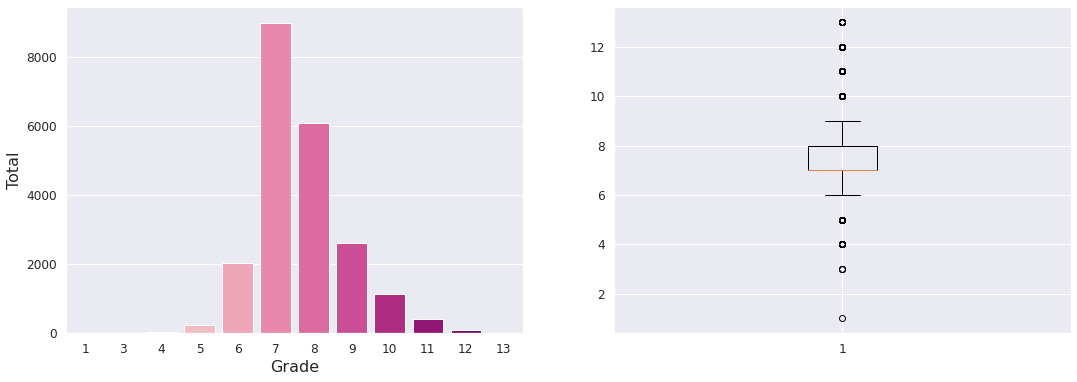

In [97]:
fig = plt.figure(figsize=(18,6))

sns.set(font_scale=1.1)

fig.add_subplot(1,2,1)
p = sns.countplot(df_new['grade'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Grade', fontsize=16)

fig.add_subplot(1,2,2)
plt.boxplot(df_new['grade'])
    
plt.show()

In [98]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['grade'], .25)
Q2 = np.quantile(df_new['grade'], .50)
Q3 = np.quantile(df_new['grade'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['grade'])
nilai_max = np.max(df_new['grade'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  7.0
Kuartil 2 =  7.0
Kuartil 3 =  8.0
IQR =  1.0
IQR minimum =  5.5
IQR maksimum =  9.5
Nilai minimum data =  1
Nilai maksimum data =  13


In [99]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Ditemukan low outlier!
Ditemukan high outlier!


In [100]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['grade']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 [5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 1, 5]
High outlier : 
 [11, 10, 11, 10, 10, 10, 10, 12, 10, 10, 10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 11, 10, 10, 10, 11, 10, 10, 12, 11, 10, 10, 10, 10, 10, 

In [101]:
df_new['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [102]:
df_new['grade_cat'] = df.apply(
    lambda x: 'Di atas 6' if x['grade'] > 6
    else 'Di bawah 6', axis=1)

In [103]:
df_new['grade_cat'].value_counts()

Di atas 6     19300
Di bawah 6     2313
Name: grade_cat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


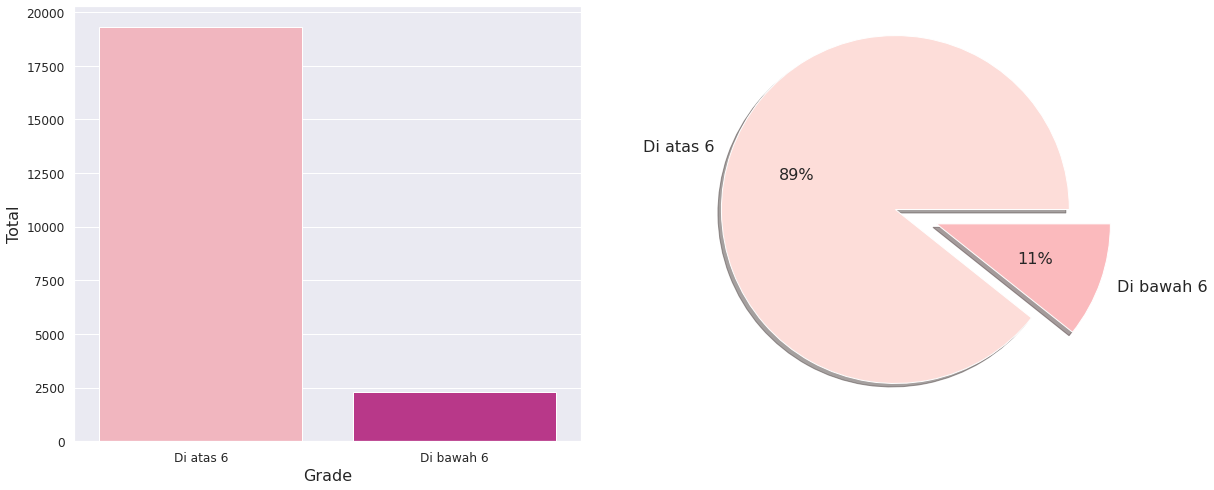

In [104]:
f = plt.figure(figsize=(20,8))

sns.set(font_scale=1.1)

f.add_subplot(1,2,1)
p = sns.countplot(df_new['grade_cat'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Grade', fontsize=16)

f.add_subplot(1,2,2)
labels = df_new['grade_cat'].unique()
colors = sns.color_palette('RdPu')

grade = df_new['grade_cat'].value_counts()
plt.pie(grade, labels=labels, autopct='%.0f%%', 
        explode=[0.25, 0], colors=colors, shadow=True, textprops={'fontsize': 16})
    
plt.show()

In [106]:
#tahun properti dibangun
df_new['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [107]:
df_new['yr_built_cat'] = df.apply(
    lambda x: 'Di atas tahun 2000' if x['yr_built'] > 2000
    else 'Di bawah tahun 2000', axis=1)

In [108]:
df_new['yr_built_cat'].value_counts()

Di bawah tahun 2000    17072
Di atas tahun 2000      4541
Name: yr_built_cat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


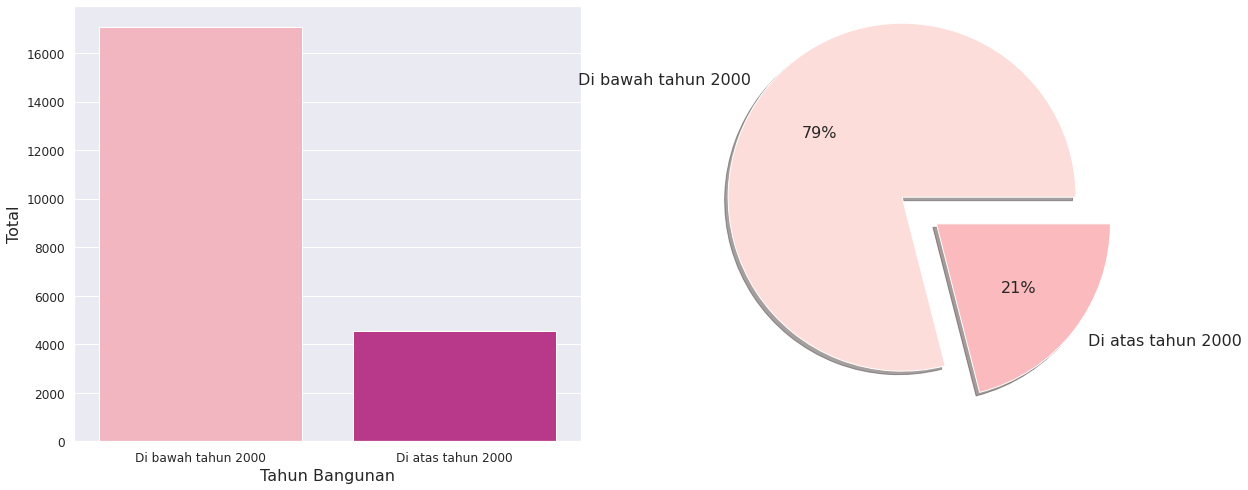

In [109]:
f = plt.figure(figsize=(20,8))

sns.set(font_scale=1.1)

f.add_subplot(1,2,1)
p = sns.countplot(df_new['yr_built_cat'], palette='RdPu')
plt.ylabel('Total', fontsize=16)
plt.xlabel('Tahun Bangunan', fontsize=16)

f.add_subplot(1,2,2)
labels = df_new['yr_built_cat'].unique()
colors = sns.color_palette('RdPu')

grade = df_new['yr_built_cat'].value_counts()
plt.pie(grade, labels=labels, autopct='%.0f%%', 
        explode=[0.25, 0], colors=colors, 
        shadow=True, textprops={'fontsize': 16})

plt.show()

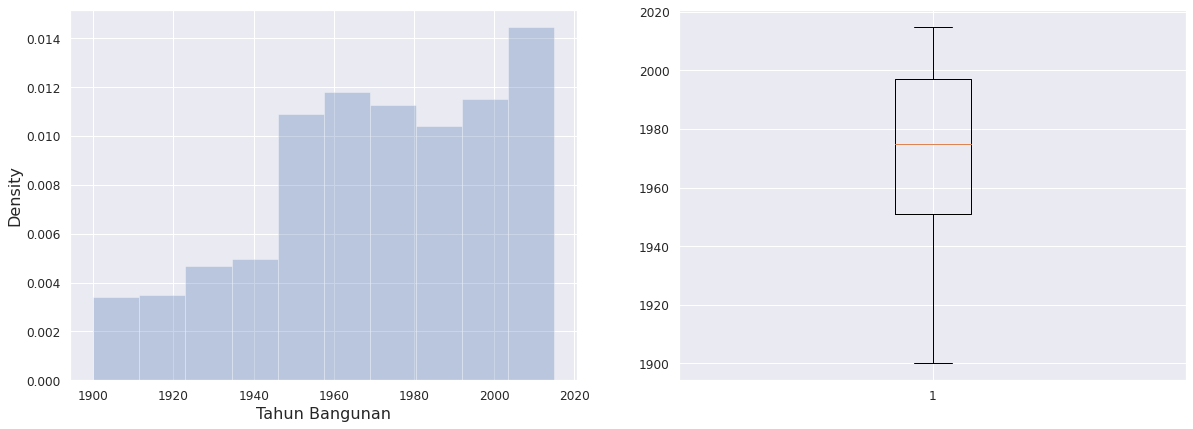

In [110]:
g = plt.figure(figsize=(20,15))

sns.set(font_scale=1.1)

g.add_subplot(2,2,1)
df_new['yr_built'].hist(density=True, alpha=0.3)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Tahun Bangunan', fontsize=16)

g.add_subplot(2,2,2)
plt.boxplot(df_new['yr_built'])

plt.show()

In [111]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df_new['yr_built'], .25)
Q2 = np.quantile(df_new['yr_built'], .50)
Q3 = np.quantile(df_new['yr_built'], .75)
IQR = Q3-Q1
min_IQR = Q1-1.5*IQR
max_IQR = Q3+1.5*IQR
nilai_min = np.min(df_new['yr_built'])
nilai_max = np.max(df_new['yr_built'])

# Hitung nilai IQR
print('Kuartil 1 = ', Q1)
print('Kuartil 2 = ', Q2)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

# Hitung min dan max IQR
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

# Hitung nilai min dan max data
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Kuartil 1 =  1951.0
Kuartil 2 =  1975.0
Kuartil 3 =  1997.0
IQR =  46.0
IQR minimum =  1882.0
IQR maksimum =  2066.0
Nilai minimum data =  1900
Nilai maksimum data =  2015


In [112]:
# Mendefinisikan outlier data
if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Tidak ditemukan low outlier!
Tidak ditemukan high outlier!


In [113]:
# Tampilkan letak data outlier
low_out = []
high_out = []

for i in df_new['yr_built']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : \n', low_out)
print('High outlier : \n', high_out)

Low outlier : 
 []
High outlier : 
 []


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

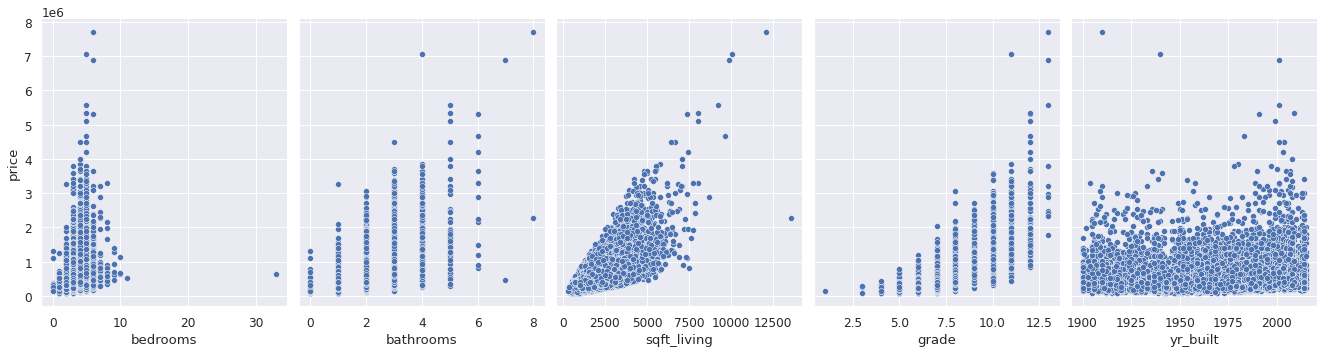

In [114]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_new, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)
plt.show()

In [115]:
df_new.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.31,0.51,0.70,0.67,0.05
bedrooms,0.31,1.00,0.47,0.58,0.36,0.15
bathrooms,0.51,0.47,1.00,0.70,0.61,0.43
sqft_living,0.70,0.58,0.70,1.00,0.76,0.32
grade,0.67,0.36,0.61,0.76,1.00,0.45
yr_built,0.05,0.15,0.43,0.32,0.45,1.00


**Variabel dengan korelasi tertinggi: grade,sqft_living, bathrooms, bedrooms **

## Machine Learning Modeling

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model

In [117]:
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built',
       'grade_cat', 'yr_built_cat'],
      dtype='object')

In [122]:
df_final = df_new.drop(columns=['grade_cat', 'yr_built_cat'])
df_final.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [123]:
X = df_final.loc[:, df_final.columns != 'price']
y = df_final['price']

### Splitting data to train and test datasets

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
print("X_train\t:", X_train.shape)
print("y_train\t:", y_train.shape)
print("X_test\t:", X_test.shape)
print("y_test\t:", y_test.shape)

X_train	: (17290, 5)
y_train	: (17290,)
X_test	: (4323, 5)
y_test	: (4323,)


### 1. Multiple Linear Regression

In [126]:
linreg_model = LinearRegression()

In [127]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [128]:
print("Slope/koefisien (b) =\n", linreg_model.coef_)
print("==========================================================")
print("Intercept (a) =\n", linreg_model.intercept_)

Slope/koefisien (b) =
 [-47486.81155204  63376.05598502    185.36612637 132226.39440928
  -3966.85481648]
Intercept (a) =
 7009989.559774566


In [129]:
coef_dict = {
    'features' : X.columns,
    'coef_value' : linreg_model.coef_,
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-47486.811552
1,bathrooms,63376.055985
2,sqft_living,185.366126
3,grade,132226.394409
4,yr_built,-3966.854816


In [130]:
y_test_pred_linreg = linreg_model.predict(X_test)

In [131]:
# Model Evaluation
acc_linreg = r2_score(y_test, y_test_pred_linreg)
def mape_value(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print('R:', np.sqrt(acc_linreg))
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1 - (1-r2_score(y_test, y_test_pred_linreg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred_linreg))
print('MSE:', mean_squared_error(y_test, y_test_pred_linreg))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_linreg)))
print('MAPE:', mape_value(y_test, y_test_pred_linreg))

R: 0.782872129516666
R^2: 0.6128887711739595
Adjusted R^2: 0.6124404144113627
MAE: 145177.91247554787
MSE: 50068666427.48913
RMSE: 223760.2878696064
MAPE: 30.021377621171375


### Prediction with Case Study (Multiple Linear Regression)

Pada suatu hari, Hilman ingin membeli sebuah rumah. Namun, rumah yang dia inginkan setidaknya memenuhi kriteria sebagai berikut:
1. bedrooms = 3
2. bathrooms = 2
3. sqft_living = 1818 sqft
4. grade = 7
5. yr_built = 2000

In [133]:
harga_rumah = linreg_model.predict([[
    3,
    2,
    1818,
    7,
    2000,
]])
print(f"Jadi harga rumahnya yaitu = USD ${harga_rumah}")

Jadi harga rumahnya yaitu = USD $[323151.98271886]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
